# Pratiksha Melgiri

# Task-1

# Prediction using Supervised ML

Predicting the percentage of an student based on the number of study hours.Predict the score if a student studies for 9.25 hrs/ day.

DATASET :http://bit.ly/w-data

# Importing all necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the dataset

In [2]:
data=pd.read_csv("http://bit.ly/w-data")

# Display all records

In [3]:
data

Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86

# Display first 5 records

In [4]:
data.head()

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

# Checking for null and duplicate values

In [5]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.duplicated().sum()

0

# Here,there are no null values, so no need to clean the data.

# Ploting the given data

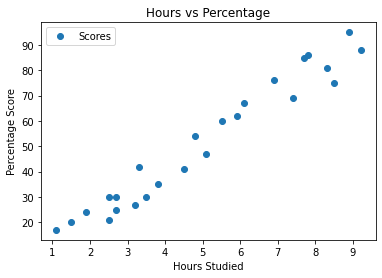

In [8]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Data Preprocessing

This step involved division of data into "attributes" (inputs) and "labels" (outputs).

In [9]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [12]:
print("Dataset : \n",data)
print(" x is : \n",X)
print(" y is : \n",y)

Dataset : 
     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
 x is : 
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
 y is : 
 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Model Training

Splitting the data into training and testing sets, and training the algorithm.

In [14]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
len(XTest)

5

In [16]:
len(XTrain)

20

# As the testsize is 0.2,the testing set has 5 enteries and the remaining 20 entries are given to the training set

# To construct a model and train it

In [17]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor = LinearRegression()  
regressor.fit(XTrain.reshape(-1,1), yTrain) 

print("Training complete.")

Training complete.


# Plotting the Line of regression

Now since our model is trained now, its the time to visualize the best-fit line of regression.

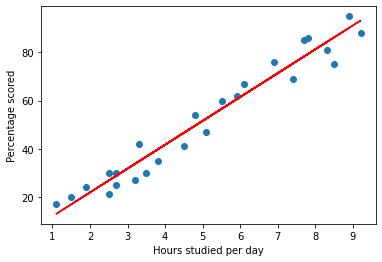

In [22]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.xlabel("Hours studied per day")
plt.ylabel("Percentage scored")
plt.show()

# Making Predictions

Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our test-set data

In [23]:
# Testing data
print(XTest)
# Model Prediction 
y_pred = regressor.predict(XTest)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Comparing Actual result to the Predicted Model result

In [25]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': yTest, 'Predicted': y_pred}) 
df

Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033

In [26]:
#Estimating training and test score
print("Training Score:",regressor.score(XTrain,yTrain))
print("Test Score:",regressor.score(XTest,yTest))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


# To predict the score for student who studies 9.25 hrs/day

In [28]:
HoursStudied = 9.25
predictedScore = regressor.predict([[HoursStudied]])
print("The predicted score for a student who studies for 9.25 hours a day is ",predictedScore[0])

The predicted score for a student who studies for 9.25 hours a day is  93.69173248737538


# So the predicted score for student who studies for 9.25 hrs/day is 93.691 approx.

# Plotting the Bar graph

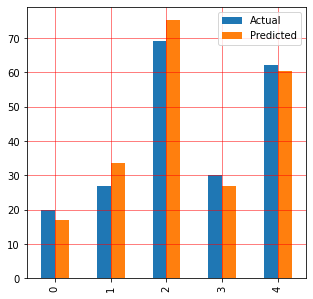

In [29]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [36]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(yTest, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(yTest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [35]:
regressor.score(XTest,yTest)

0.9454906892105356

# So the accuracy of this model is 0.94 ( 94%)

# Thank You!